#  Chapter 8, exercise 10

Plot 2D representations of MNIST data using:
* t-SNE
* PCA
* LLE
* MDS

## Set up

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [3]:
# Common imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [4]:
# Settings

# Matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (6.0, 6.0)

# Pandas
pd.set_option('max_rows', 7)
pd.set_option('max_columns', 50)

# Numpy
# np.random.seed(42)  # to make this notebook's output stable across runs

## Data

In [5]:
%%capture --no-stdout

# Get data
#   hide warning about future depracation of fetch_mldata with v 0.22

# Impore MNIST data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', )
X, y = mnist['data'].astype(float), mnist['target'].astype(float)

In [6]:
# Useing a random subset for time conserns
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

## Datavis - dimensionality reduction

In [7]:
### Quick initial reduction with randomized PCA
from sklearn.decomposition import PCA
randpca = PCA(n_components=50, svd_solver='randomized')
X_red = randpca.fit_transform(X)

### t-SNE

In [8]:
from sklearn.manifold import TSNE

tsne_clf = TSNE(n_components=2)
X_tsne = tsne_clf.fit_transform(X_red)

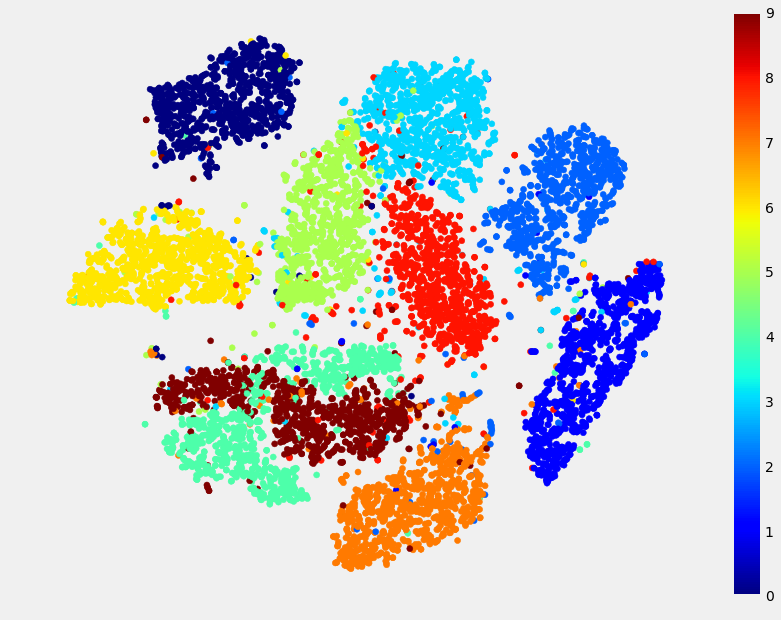

In [10]:
plt.figure(figsize=(13, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [12]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X_red[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

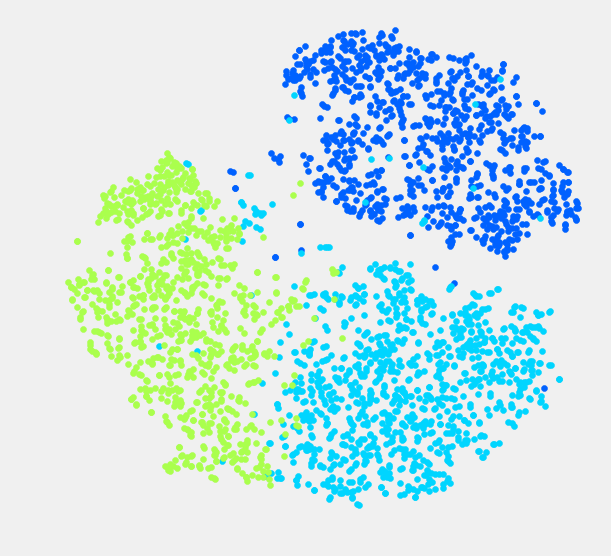

In [15]:
cmap = plt.cm.get_cmap("jet")
plt.figure(figsize=(9, 9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], 
                X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

In [19]:
# Straight from text example

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

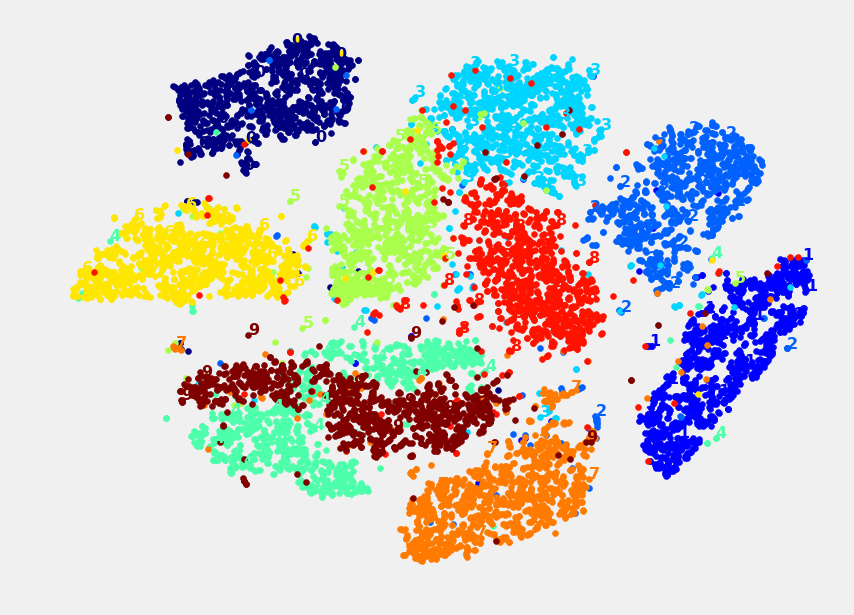

In [21]:
plot_digits(X_tsne, y)

See extended work in text notebook